In [136]:
#NAME:KHUSHAL BORSE
#letgrowmore


In [137]:
#import all library

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
#read dataset

In [140]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset = pd.read_csv(url)

In [141]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [142]:
#print first 5 rows

In [143]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [144]:
#check Null values in dataset

In [145]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [146]:
dataset1=dataset.reset_index()['Close']


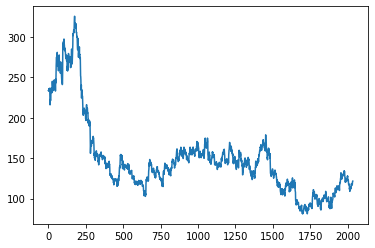

In [147]:
plt.plot(dataset1)


In [148]:
print(dataset1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [149]:
#scalling of dataset

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset1=scaler.fit_transform(np.array(dataset1).reshape(-1,1))

In [151]:
print(dataset1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [152]:
#splitting dataset into train and test split
training_size=int(len(dataset1)*0.70)
test_size=len(dataset1)-training_size
train_data,test_data=dataset1[0:training_size,:],dataset1[training_size:len(dataset1),:1]

In [153]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [154]:
test_data

array([[0.32148693],
       [0.32352941],
       [0.3255719 ],
       [0.32638889],
       [0.33496732],
       [0.34395425],
       [0.3441585 ],
       [0.34599673],
       [0.35866013],
       [0.35580065],
       [0.37214052],
       [0.36294935],
       [0.3754085 ],
       [0.36315359],
       [0.34640523],
       [0.34579248],
       [0.34844771],
       [0.35784314],
       [0.34722222],
       [0.33353758],
       [0.33537582],
       [0.33680556],
       [0.33680556],
       [0.32271242],
       [0.32638889],
       [0.3188317 ],
       [0.33986928],
       [0.37765523],
       [0.3999183 ],
       [0.36968954],
       [0.35886438],
       [0.35927288],
       [0.35294118],
       [0.32107843],
       [0.31413399],
       [0.31740196],
       [0.31597222],
       [0.32209967],
       [0.28267974],
       [0.28492647],
       [0.27389706],
       [0.28778595],
       [0.30187908],
       [0.31045752],
       [0.32128268],
       [0.31454248],
       [0.33129085],
       [0.332

In [155]:
# convert an array of values into a dataset matrix


In [156]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [157]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [158]:
X_train.shape

(1323, 100)

In [159]:
y_train.shape

(1323,)

In [160]:
X_test.shape

(510, 100)

In [161]:
y_test.shape

(510,)

In [162]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [163]:
#build Lstm

In [164]:
import tensorflow as tf

In [165]:
from keras.models import Sequential

In [166]:
seq=Sequential()

In [167]:
from keras.layers import Dense
from keras.layers import LSTM

In [168]:
seq.add(LSTM(50,return_sequences=True ,input_shape=(100,1)))
seq.add(LSTM(50,return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1))

In [169]:
seq.compile(loss='mean_squared_error',optimizer='adam')

In [170]:
seq.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [171]:
seq.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 12s 258ms/step - loss: 0.0209 - val_loss: 0.0038
Epoch 2/60
19/19 [==============================] - 3s 176ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 3s 182ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 3s 174ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/60
19/19 [==============================] - 3s 179ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 180ms/step - loss: 0.0014 - val_loss: 9.2918e-04
Epoch 7/60
19/19 [==============================] - 3s 174ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 178ms/step - loss: 0.0014 - val_loss: 8.7856e-04
Epoch 9/60
19/19 [==============================] - 3s 179ms/step - loss: 0.0012 - val_loss: 7.9011e-04
Epoch 10/60
19/19 [==============================] - 3s 175ms/step - loss: 0.0011 - val

In [172]:
#prediction and check performance metrics
train_predict=seq.predict(X_train)
test_predict=seq.predict(X_test)

In [173]:
inverse_prediction=scaler.inverse_transform(prediction)

In [174]:
inverse_prediction

array([[130.06573 ],
       [129.42892 ],
       [128.43011 ],
       [127.04364 ],
       [125.47669 ],
       [124.05981 ],
       [123.1866  ],
       [122.22639 ],
       [121.40929 ],
       [121.02082 ],
       [120.85291 ],
       [120.590034],
       [120.049644],
       [119.292046],
       [118.55441 ],
       [118.03633 ],
       [117.712524],
       [117.428696],
       [117.43305 ],
       [117.82659 ],
       [118.44082 ],
       [119.17157 ],
       [119.76132 ],
       [119.96747 ],
       [119.79676 ],
       [119.480965],
       [118.994125],
       [117.98702 ],
       [116.526794],
       [114.86038 ],
       [113.16006 ],
       [111.5391  ],
       [110.197975],
       [109.356   ],
       [108.87055 ],
       [108.82244 ],
       [109.35271 ],
       [110.216156],
       [111.27035 ],
       [112.12992 ],
       [112.57868 ],
       [112.446945],
       [111.80374 ],
       [110.94145 ],
       [110.20845 ],
       [109.72193 ],
       [109.65501 ],
       [110.0

In [175]:
from sklearn.metrics import mean_squared_error

In [176]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.021066432541936943